In [1]:
%matplotlib inline

In [2]:
from collections import namedtuple
from glob import glob
import re

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
Rate = namedtuple('Rate', ['accept', 'total', 'efficiency'])

## Signal efficiency

In [5]:
signal_rates = {
    0.6: (25808, 25843),
    0.65: (25780, 25843),
    0.7: (25739, 25843),
    0.75: (25679, 25843),
    0.8: (25557, 25843),
    0.85: (25484, 25843),
    0.9: (25366, 25843),
    0.95: (25149, 25843),
    1: (24850, 25843),
    1.05: (24354, 25843),
    1.1: (23530, 25843),
    1.15: (22688, 25843),
    1.2: (21449, 25843),
    1.25: (19697, 25843),
    1.3: (17052, 25843),
    1.35: (13284, 25843),
    1.4: (8984, 25843),
    1.45: (3041, 25843),
    1.5: (428, 25843),
    1.55: (16, 25843),
    1.6: (0, 25843),
}
signal_rates = {k: Rate(a, t, a/t) for k, (a, t) in signal_rates.items()}

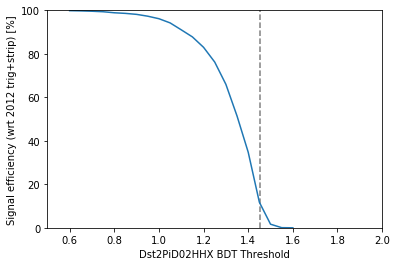

In [6]:
xs, ys = list(zip(*sorted(signal_rates.items())))
plt.axvline(1.455, ls='--', c='k', alpha=0.5)
plt.plot(xs, [r.efficiency*100 for r in ys])
plt.xlim(0.5, 2)
plt.ylim(0, 100)
plt.xlabel('Dst2PiD02HHX BDT Threshold')
plt.ylabel('Signal efficiency (wrt 2012 trig+strip) [%]')

## Background "efficiency"

In [7]:
def get_n_entries(df, algorithm_name):
    algorithm = df[df.Algorithm == algorithm_name]
    assert len(algorithm) == 1
    return algorithm.iloc[0].entries

In [8]:
background_rates = {}
for fn in sorted(glob('MooreDev_v26r2_BDT_Threshold_*/Moore_RateTest.csv')):
    a, b = re.search('BDT_Threshold_(\d+)_(\d+)/', fn).groups()
    threshold = int(a)+int(b)/10
    
    df = pd.read_csv(fn, sep=', ', engine='python')
    n_total = get_n_entries(df, 'EVENT LOOP')
    n_accepted = get_n_entries(df, 'Hlt2CharmHadInclDst2PiD02HHXBDTDecision')
    efficiency = n_accepted/n_total
    
    background_rates[threshold] = Rate(n_accepted, n_total, efficiency)
    print(f'Threshold = {threshold}: Accepted {n_accepted} out of {n_total} ({efficiency:.1%})')

Threshold = 0.6: Accepted 110 out of 1000 (11.0%)
Threshold = 0.8: Accepted 99 out of 1000 (9.9%)
Threshold = 0.9: Accepted 90 out of 1000 (9.0%)
Threshold = 1.0: Accepted 78 out of 1000 (7.8%)
Threshold = 1.1: Accepted 58 out of 1000 (5.8%)
Threshold = 1.3: Accepted 23 out of 934 (2.5%)
Threshold = 1.4: Accepted 7 out of 610 (1.1%)
Threshold = 1.5: Accepted 1 out of 303 (0.3%)


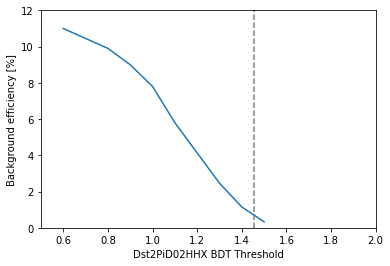

In [9]:
xs, ys = list(zip(*sorted(background_rates.items())))
plt.axvline(1.455, ls='--', c='k', alpha=0.5)
plt.plot(xs, [r.efficiency*100 for r in ys])
plt.xlim(0.5, 2)
plt.ylim(0, 12)
plt.xlabel('Dst2PiD02HHX BDT Threshold')
plt.ylabel('Background efficiency [%]')

# Summary

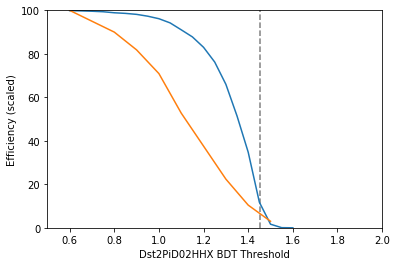

In [10]:
plt.axvline(1.455, ls='--', c='k', alpha=0.5, label='Current threshold')
xs, ys = list(zip(*sorted(signal_rates.items())))
plt.plot(xs, [r.efficiency*100 for r in ys], label='Signal')
xs, ys = list(zip(*sorted(background_rates.items())))
plt.plot(xs, [r.efficiency*100/ys[0].efficiency for r in ys], label='Background')
plt.xlim(0.5, 2)
plt.ylim(0, 100)
plt.xlabel('Dst2PiD02HHX BDT Threshold')
plt.ylabel('Efficiency (scaled)')